In [25]:
import pandas as pd
import matplotlib.pyplot as plt

file_names = {'WTM3':'2024_11_12_0003.abf',
              'Bckdk':'2024_11_27_0017.abf',
              'USP7': '2024_12_02_0009.abf'}
sheet_names = {'WTM3': 'WT M3 C3 003.abf',
               'Bckdk': 'Bckdk KO M11 C3 017.abf ',
               'USP7': 'Usp7 Het M13 009.abf'}

consider = 'WTM3'
data = pd.read_excel('AP_traces.xlsx', sheet_name=sheet_names[consider],
                     usecols='B:O',  header=0, skiprows=[1])


In [13]:
import numpy as np
def show_rawdata(ax, currs=['15 pA', '25 pA', '35 pA']):
    for cc in currs:
        ax.plot(data['Time (ms)'] / 1000, 
                data[cc], 
                label=cc)
    ax.set_xlim(-0.1, 1.5)
    ax.set_ylim(-80, 50)
    ax.legend()
    return ax

In [14]:
import ipywidgets as widgets
import numpy as np
from IPython.display import display, clear_output
from widgets_aut import *

In [15]:
from neuron472299294 import Neuron472299294
from test_autism import *
from neuron import h
h.celsius = 34.0
cell = Neuron472299294(name='neuron')

Input resistance is  310.71351315276064 megohms


In [16]:
def get_passive(cm, g_pas, ra):
    cell.update_factors({'cm': cm, 'g_pas': g_pas, 'ra': ra})
r = widgets.interact(get_passive, cm=pick_cm, g_pas=pick_gpas, ra=pick_Ra)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='cm:', layout=Layout(width='…

In [17]:
cell, results, clamp = demo([15, 25, 35], {'cm': pick_cm.value, 
                                           'g_pas': pick_gpas.value, 
                                           'ra': pick_Ra.value})

Input resistance is  310.71351315276064 megohms
Input resistance is  822.5941653899041 megohms


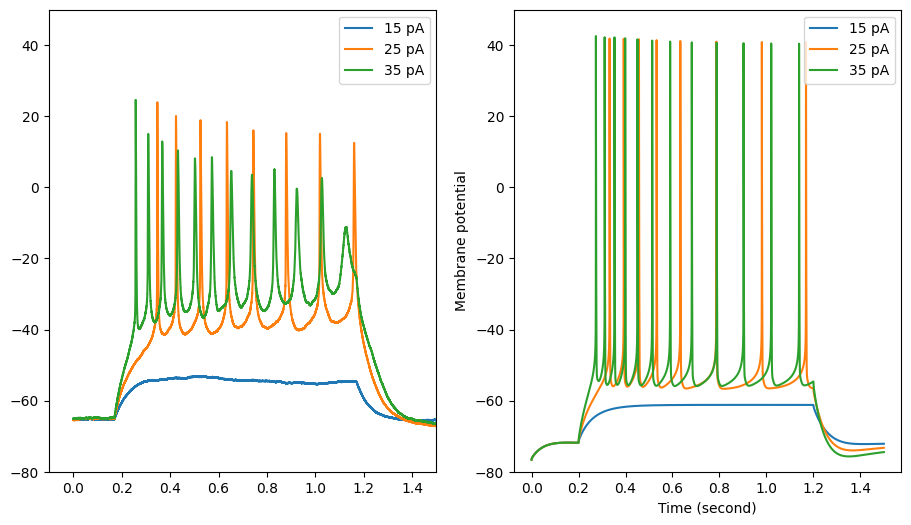

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11 ,6
fig, ax = plt.subplots(1,2)
ax[0] = show_rawdata(ax[0])
ax[1] = make_plots(ax[1], results)


In [19]:
def get_active(Na_T, Na_P, K_P, K_T, Kv_3_1, SK, HVA, LVA, Im, Ih):
    cell.update_factors({'cm': pick_cm.value, 
                         'g_pas': pick_gpas.value, 
                         'ra': pick_Ra.value,
                         'gbar_NaTs': Na_T, 
                         'gbar_Nap': Na_P,
                         'gbar_K_P': K_P, 
                         'gbar_K_T': K_T,
                         'gbar_Kv_3_1': Kv_3_1, 
                         'gbar_SK': SK,
                         'gbar_Ca_HVA': HVA,
                         'gbar_Ca_LVA': LVA,
                         'gbar_Im': Im,
                         'gbar_Ih':Ih})
r2 = widgets.interact(get_active,
                      cm=pick_cm, g_pas=pick_gpas, ra=pick_Ra,
                      Na_T=pick_gbar_NaTs, 
                      Na_P=pick_gbar_Nap,
                      K_P=pick_gbar_K_P, 
                      K_T=pick_gbar_K_T,
                      Kv_3_1=pick_gbar_Kv_3_1, 
                      SK=pick_gbar_SK,
                      HVA=pick_gbar_Ca_HVA,
                      LVA=pick_gbar_Ca_LVA,
                      Im=pick_gbar_Im,
                      Ih=pick_gbar_Ih)

interactive(children=(FloatSlider(value=1.1, continuous_update=False, description='gbar_NaTs:', layout=Layout(…

In [26]:
cell, results, clamp = demo([15, 25, 35], {'cm': pick_cm.value, 
                                           'g_pas': 0.35, # pick_gpas.value, 
                                           'ra': pick_Ra.value,
                                           'gbar_NaTs': pick_gbar_NaTs.value, 
                                           'gbar_Nap': pick_gbar_Nap.value, 
                                           'gbar_K_P': pick_gbar_K_P.value, 
                                           'gbar_K_T':pick_gbar_K_T.value,
                                           'gbar_Kv_3_1':pick_gbar_Kv_3_1.value, 
                                           'gbar_SK':pick_gbar_SK.value,
                                           'gbar_Ca_HVA':pick_gbar_Ca_HVA.value,
                                           'gbar_Ca_LVA':pick_gbar_Ca_LVA.value,
                                           'gbar_Im':pick_gbar_Im.value,
                                           'gbar_Ih':pick_gbar_Ih.value})


Input resistance is  310.71351315276064 megohms
Input resistance is  822.5941653899041 megohms


In [27]:
consider = 'USP7'
data = pd.read_excel('AP_traces.xlsx', sheet_name=sheet_names[consider],
                     usecols='B:O',  header=0, skiprows=[1])

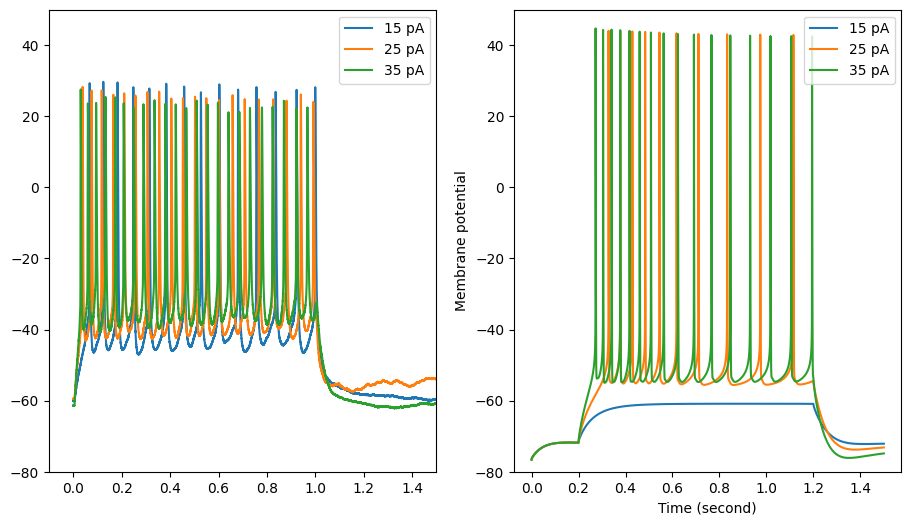

In [28]:
rcParams['figure.figsize'] = 11 ,6
fig, ax = plt.subplots(1,2)
ax[0] = show_rawdata(ax[0])
ax[1] = make_plots(ax[1], results)

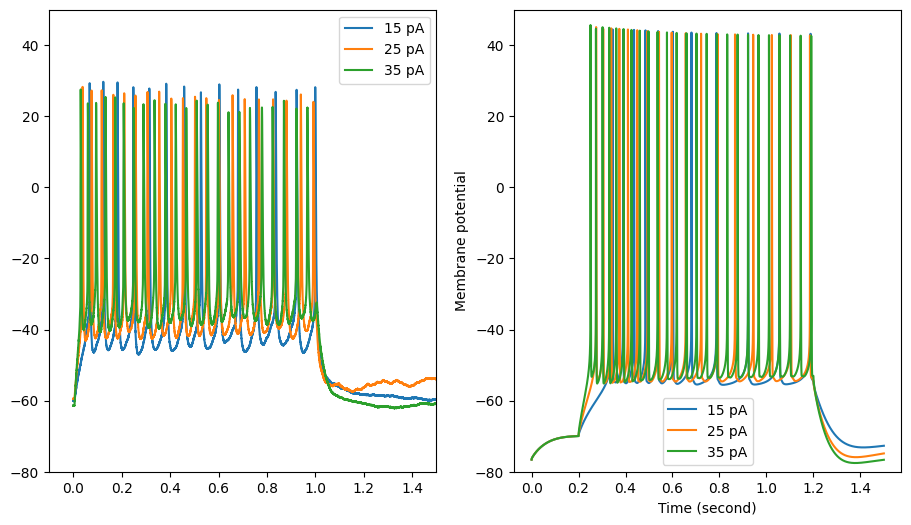

In [24]:
rcParams['figure.figsize'] = 11 ,6
fig, ax = plt.subplots(1,2)
ax[0] = show_rawdata(ax[0])
ax[1] = make_plots(ax[1], results)